In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# label load

In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_test_labels = np.array(test_X)
print(one_hot_test_labels)
print(one_hot_test_labels.shape)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(935, 262)


# decoder load

In [7]:
#decoder = load_model('./save_models/ae/stacked_decoder_v7.h5')

In [8]:
decoder = load_model('./save_models/ae/residual_decoder_v15.h5')

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
pred = pd.read_excel('./pred_rae_v3.xlsx')
pred = pred.drop(['Unnamed: 0'], axis=1)
pred

,0,1,2,3
0,0.001619,0.024021,0.002476,0.049724
1,0.000080,0.077409,0.002567,0.030398
2,0.001169,0.042453,0.001670,0.085674
3,0.000125,0.074304,0.004806,0.031394
4,0.000133,0.068421,0.006489,0.035966
...,...,...,...,...
930,0.000140,0.026113,0.000045,0.090988
931,0.000311,0.028926,0.000477,0.105285
932,0.000211,0.047491,0.000082,0.096327
933,0.001074,0.024420,0.001585,0.053261


In [10]:
test_decode = decoder.predict(np.array(pred))
test_decode

array([[1.1200959e-16, 9.3690505e-07, 1.0368038e-18, ..., 5.0462417e-13,
        5.0131284e-04, 3.6922796e-04],
       [4.2375648e-15, 5.3151235e-09, 2.7890320e-25, ..., 7.0604762e-17,
        1.2021164e-05, 2.6580707e-05],
       [5.3957008e-18, 1.0781488e-06, 2.4207411e-33, ..., 1.9658950e-14,
        1.2586368e-05, 8.9920668e-06],
       ...,
       [1.0842176e-18, 2.2736130e-07, 1.3313306e-37, ..., 4.5136332e-16,
        4.4515737e-06, 2.2767165e-06],
       [6.7071768e-17, 1.2692386e-06, 3.4370211e-20, ..., 3.2644807e-13,
        3.5665839e-04, 2.6026531e-04],
       [7.1743147e-25, 6.6641773e-17, 0.0000000e+00, ..., 7.8745138e-18,
        2.9179506e-10, 2.8360756e-07]], dtype=float32)

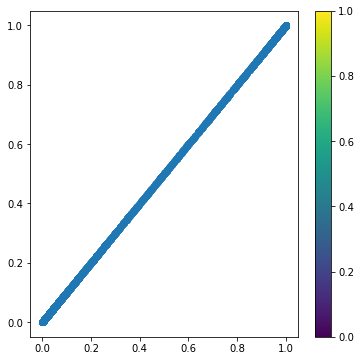

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [12]:
"""test_predict = test_decode.round()
test_predict"""

'test_predict = test_decode.round()\ntest_predict'

In [13]:
test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [15]:
#c_matrix.shape

In [16]:
#c_matrix

In [17]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.011764705882352941
precision :  0.060240963855421686
recall :  0.03913305237808549
f1 :  0.04744525547445256
------------------------
hamming_loss :  0.01065436584071519


In [18]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')